# 基本图像分类：对Fashion MNIST图像分类

In [1]:
import sys
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
import numpy as np


%matplotlib inline

print("python version: ", sys.version_info)
for module in np, mpl, tf, keras:
    print(module.__name__, "version: ", module.__version__)
    
seed = 10383

python version:  sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)
numpy version:  1.16.0
matplotlib version:  3.0.3
tensorflow version:  2.3.0
tensorflow.keras version:  2.4.0


### 1. 导入Fashion MNIST数据集

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### 2. 浏览数据

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels[:10]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8], dtype=uint8)

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

### 3. 数据预处理

#### 3.1 显示一个图像

像素值处于0到255之间

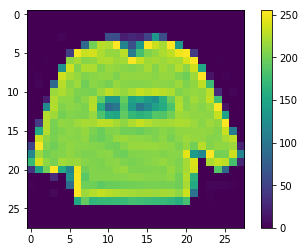

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### 3.2 将像素值缩小到0到1之间

In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

### 3.3 验证数据格式是否正确

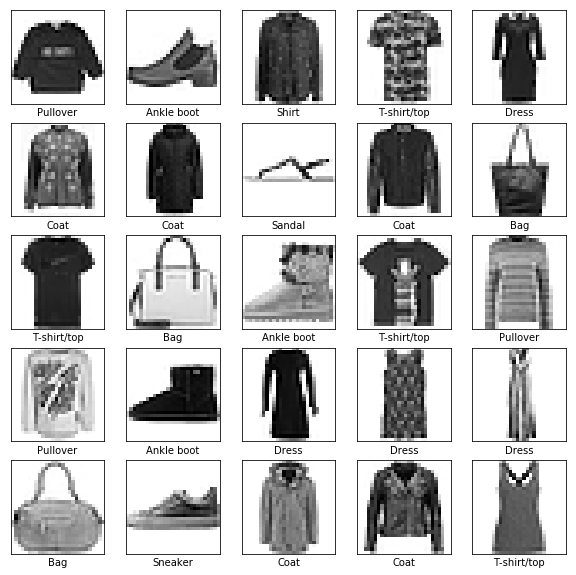

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 4. 构建模型

#### 4.1 设置层

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10)
])

#### 4.2 编译模型

In [11]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

### 5. 训练模型

#### 5.1 向模型馈送数据

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5041 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3815 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.3422 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3166 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3003 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2726 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.2614 - accuracy: 0.9016
Epoch 9/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2527 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 2s 924us/step - los

#### 5.2 评估准确率

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: ", test_acc)

313/313 - 0s - loss: 0.3128 - accuracy: 0.8866

Test accuracy:  0.8866000175476074


#### 5.3 进行预测

进过训练后的模型具有线性输出，即 logits。  
可以附加一个 softmax 层，将 logits 转换成更容易理解的概率  

In [14]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

In [16]:
predictions[0]

array([8.4468335e-01, 1.2793934e-09, 6.8230159e-04, 2.1907399e-05,
       1.5604071e-05, 2.2886592e-11, 1.5459655e-01, 2.0027232e-13,
       1.6160143e-07, 6.6598858e-11], dtype=float32)

In [17]:
np.argmax(predictions[0])

0

In [18]:
test_labels[0]

0

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

#### 5.4 验证预测结果

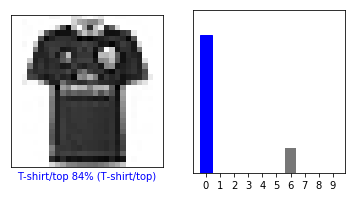

In [20]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

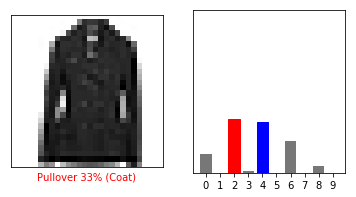

In [21]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

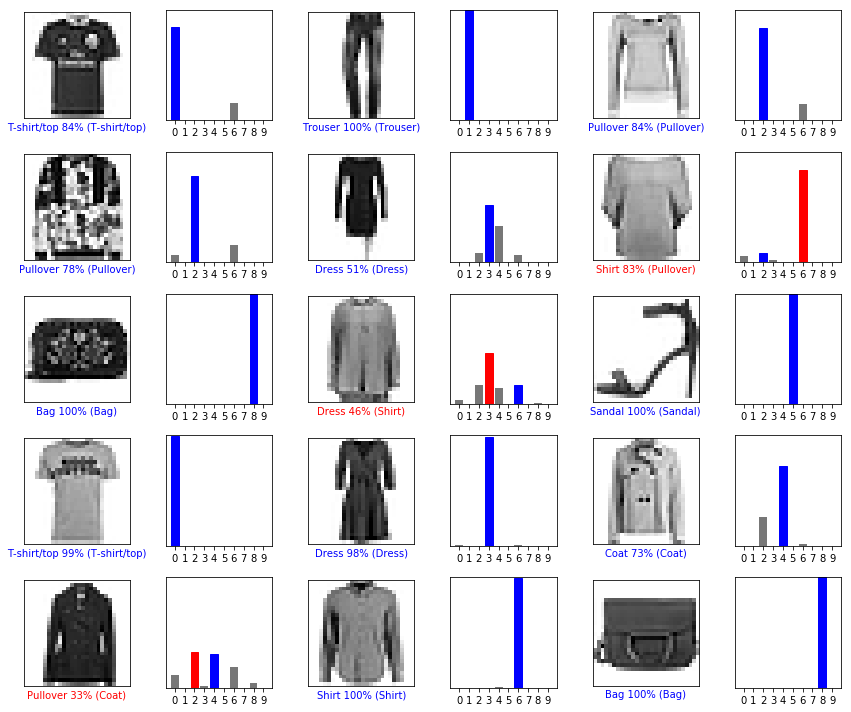

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 6. 使用训练好的模型

In [23]:
img = test_images[1]
img.shape

(28, 28)

In [24]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [25]:
predictions_single = probability_model.predict(img)
predictions_single

array([[6.2578551e-09, 9.9999881e-01, 2.0712449e-12, 1.1950794e-06,
        2.9392291e-10, 1.5768165e-13, 3.1311852e-11, 5.3156464e-12,
        1.0282700e-09, 2.4392810e-15]], dtype=float32)

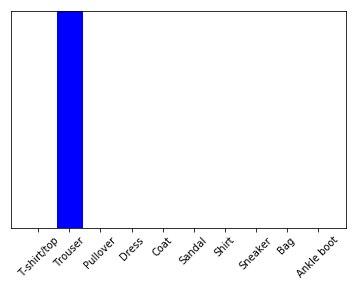

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

1